In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd 
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
! pip install wordcloud


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import os.path, time
print("created: %s" % time.ctime(os.path.getctime("/content/drive/MyDrive/Colab Notebooks/G5_Innovation_Abdou.ipynb")))

created: Wed Jan  6 14:48:16 2021


In [ ]:
cd /content/drive/My\ Drive/Colab\ Notebooks/G5\ Inter-Promo\ 2021/Données/Input

/content/drive/.shortcut-targets-by-id/1ykBO6hTtGVNV3ua83L9Q2wSAOlRCk_7k/G5 Inter-Promo 2021/Données/Input


In [ ]:
data=pd.read_json("Data.json")
data.head()

,art_id,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag
0,0,,None,7 décembre 2018,fr,4ème Conférence Nationale de l’Emploi Territor...,http://fncdg.com/4eme-conference-nationale-de-...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2018/12/ra...,None,None
1,1,La FNCDG et l’ANDCDG ont publié en septembre l...,"<p style=""text-align: justify;"">La FNCDG et l’...",22 septembre 2020,fr,9ème édition du Panorama de l’emploi territorial,http://fncdg.com/9eme-edition-du-panorama-de-l...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/09/im...,None,None
2,2,Malgré la levée des mesures de confinement le ...,"<p style=""text-align: justify;"">Malgré la levé...",17 mars 2020,fr,ACTUALITÉS FNCDG / COVID19,http://fncdg.com/actualites-covid19/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/03/co...,None,None
3,3,,None,28 juin 2017,fr,Arrêté de création GIP,http://fncdg.com/arrete-de-creation-gip/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2017/05/fo...,None,None
4,4,,None,24 novembre 2017,fr,Article Acteurs Publics « Les centres de gesti...,http://fncdg.com/article-acteurs-publics-les-c...,FNCDG,xpath_source,http://fncdg.com/actualites/,None,None,None


In [ ]:
bow=pd.read_csv("BOW.csv")
bow.head()

In [ ]:
tf=pd.read_csv("TF-IDF.csv")
tf.head()

In [ ]:
data = pd.read_csv("Data_With_Features_Syntax.csv")
data.shape

(12146, 36)

In [ ]:
stop_words = set(stopwords.words('french'))
def preprocessing(text) :
  
  words = word_tokenize(text)
  for i in range(len(words)):
    words[i] = words[i].lower()
  pattern = ['(', ')', ':', ';', ',', '&', '/', '"', "’",'\n','©','n°','-','.','»','«']
  mylist = []
  for w in words :
    if (w not in stop_words) and (w not in pattern) :
      mylist.append(w)
  return mylist

In [ ]:
article=data['art_content'].values[2]
print(preprocessing(article))

['malgré', 'levée', 'mesures', 'confinement', '11', 'mai', '2020', 'plupart', 'mesures', 'sanitaires', 'prises', 'pendant', 'période', 'urgence', 'sanitaire', 'devront', 'poursuivre', 'afin', 'éviter', 'recrudescence', 'épidémie', 'covid-19', 'ainsi', 'reprise', 'progressive', 'activité', 'employeurs', 'publics', 'agents', 'services', 'santé', 'sécurité', 'travail', 'centres', 'gestion', 'rôle', 'important', 'jouer', 'cet', 'égard', 'guide', 'déconfinement', 'comment', 'préparer', 'reprise', 'activité', 'contribution', 'issue', 'travail', 'collaboratif', 'entre', 'centres', 'gestion', 'andcdg', 'fncdg', 'a', 'vocation', 'constituer', 'appui', 'collectivités', 'établissements', 'reprise', 'activité', 'contexte', 'où', 'enjeux', 'rh', 'nombreux', 'complexes…', 'document', 'organise', 'autour', 'plusieurs', 'parties', 'notamment', 'méthodologie', 'mise', 'place', 'plan', 'reprise', 'activité', 'mesures', 'pratiques', 'organisationnelles', 'prévoir', 'cette', 'reprise', 'télécharger', 'gui

In [ ]:

def nuage_de_mots(text) :
  wc = WordCloud()
  wc.generate(str(text))
  #wc.to_file('output.png')
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Fonction nuage de mots avec un article**



In [ ]:
def fonction_wc1(article) :
  nuage_de_mots(preprocessing(article))




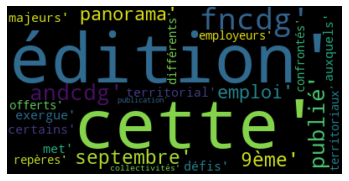

In [ ]:
article=data['art_content'].values[1]
fonction_wc1(article)

**Fonction nuage de mots avec une liste d'article**

In [ ]:
def fonction_wc2(list_art) :
  new_list = []
  for txt in list_art :
    new_list.extend(preprocessing(txt))
  nuage_de_mots(new_list)



In [ ]:
articles=data['art_content']
fonction_wc2(articles)

In [ ]:
#test
stop_words = set(stopwords.words('french'))
r=0
for i in stop_words:
  if i=="Le":
    r=1
print(r)

0


**ACP**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
data = pd.read_csv("Data_With_Features_Syntax.csv")
data.drop(["Unnamed: 0","art_id","art_content","art_content_html","art_extract_datetime","art_lang","art_title",
           "art_url","src_name","src_type","src_url","src_img","art_auth","art_tag","title_postive_score","title_negative_score",
           "title_polarity_score","title_subjectivity_score","netloc.com","ratio_word_title_on_word"],axis = 1, inplace = True)
data["average_word_sentence"] = data["average_word_sentence"].fillna(0)
clf = LocalOutlierFactor(n_neighbors=2, contamination = 0.01)
y = clf.fit_predict(data)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X = pca.fit_transform(data)

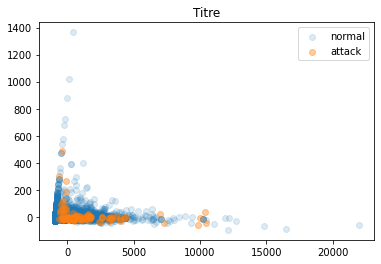

In [ ]:
import matplotlib.pyplot as plt

plt.title('Titre')
plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.15, label='normal')
plt.scatter(X[y == -1, 0], X[y == -1, 1], alpha=0.4, label='attack')
plt.legend()

 **Lemmatisation (06/01)** 

In [ ]:
"""from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
article=data['art_content'].values[1]
mot = preprocessing(article)
print(lemmatizer.lemmatize('rocks'))"""

In [ ]:
!pip install fr_core_news_md
import re
import spacy
import fr_core_news_md

In [ ]:
#exemple
nlp = fr_core_news_md.load()

doc = nlp("voudrais non animaux yeux dors couvre.")
print(doc)
for token in doc:
    print(token, token.lemma_)

**Fonction de lemmatisation**

In [ ]:
nlp = fr_core_news_md.load()
def function_lemmatizer(text) :
  list_lemma = []
  document = nlp(text)
  for token in document :
    list_lemma.append(token.lemma_)
  return list_lemma




In [ ]:
data = pd.read_json("Données/Input/Data.json")

**Fonction de nettoyage sur un article**

In [ ]:
def sentence(text) :
  clean_list = preprocessing(text)
  clean_sentence = my_list[0]
  for ind in range(1,len(my_list)) :
    clean_sentence += " "+my_list[ind]
  return clean_sentence



In [ ]:
print(sentence(data['art_content'].values[2]))

fncdg andcdg publié septembre 9ème édition panorama emploi territorial cette édition met exergue certains défis majeurs auxquels employeurs territoriaux confrontés différents repères offerts collectivités cette publication


**Fonction de nettoyage sur plusieurs articles**

In [ ]:
"""def list_sentence(text) :
  the_list = []
  for art in text :
    the_list.extend(sentence(art))
  return the_list
  """

In [ ]:
lexique_innovation = sentence("Ressources/Lexique_Innovation.txt")
print(lexique_innovation)

fncdg andcdg publié septembre 9ème édition panorama emploi territorial cette édition met exergue certains défis majeurs auxquels employeurs territoriaux confrontés différents repères offerts collectivités cette publication
